<div style="background-color:#032866;height:60px;padding-top:7px">
<h2 align = 'center' style ="color:white">San Diego - Housing & Accomodation Data Processing</h2>
</div>

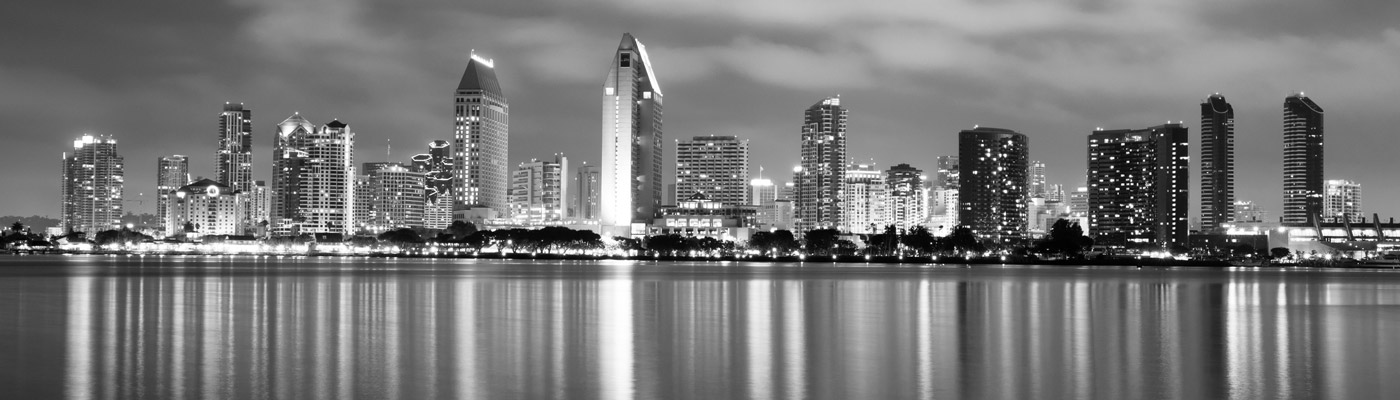

<h4> Avinash Pasupulate</h4>
<br>
<i><a href = 'mailto:avinash.pasupulate@gmail.com'> avinash.pasupulate@gmail.com </a></i><br><br>
<i><b><a href = 'https://github.com/avinashpasupulate'> GitHub Profile </a></b></i>
<br>



<h3>Tasks</h3> 
 <ol>
    <li>Explore data</li>
    <li>Clean individual data sets</li>
    <li>Transformation</li>
    <li>Combining data sets where required</li>
</ol>


<h3>Future Tasks</h3>
<ol>
    <li>Quality control pending</li>
    <ul>
        <li>Tableau dashboards</li>
        <li>Development Document</li>
    </ul>
    <br>
    <li>Exploring external data sources (macro variables)</li>
    <ul>
        <li>Weather data (Humidity, Temperature)</li>
        <li>Event / festivals related data</li>
        <li>Comparing listings with hotels</li>
    </ul>
    <br>
    <li>Mining for more information from the provided data</li>
    <ul>
        <li>Forecast listing price across relevant categories (use Tabpy package to integrate complex forecasting techniques)</li>
        <li>Recommend listings to users based on past activity, if data is available</li>
        <li>Process text data from space, reviews, host related information, listing information</li>
        <ul>
            <li>Extract entities from text data</li>
            <li>Sentiment using nltk (vader) pakage on the reviews</li>
        </ul>
        <li>Using GIS data to get distance from prime locations</li>
        <li>GIS to extract additional information using external data sources</li>
    </ul>
</ol>

<h3>Importing data and making working Copies</h3>

In [71]:

# importing required libraries
import os
import re
import copy
import pathlib
import numpy as np
import pandas as pd

# offline plotting libraries
from plotly import tools
import plotly.graph_objs as go
from plotly.offline import download_plotlyjs, iplot, plot, init_notebook_mode

# setting up environmental variables
init_notebook_mode(connected = True)
cwd = os.getcwd()
pd.set_option('display.max_columns', 100)

In [72]:
# listing raw data files & folders
data = r'/airbnb_sample/'
os.listdir(os.getcwd()+data)

['aux_data',
 'calendar.csv',
 'listings.csv',
 'neighbourhoods.csv',
 'reviews.csv']

In [73]:
# importing raw_data
listing = pd.read_csv(cwd+data+r'listings.csv')
calendar = pd.read_csv(cwd+data+r'calendar.csv')
neighbourhoods = pd.read_csv(cwd+data+r'neighbourhoods.csv')
reviews = pd.read_csv(cwd+data+r'reviews.csv')

In [74]:
# creating working copies
# delete extra variables when done processing
listcp = copy.deepcopy(listing)
calcp = copy.deepcopy(calendar)
neighcp = copy.deepcopy(neighbourhoods)
revcp = copy.deepcopy(reviews)

In [75]:
#listcp.describe(include = 'all')

In [76]:
#calcp.describe(include = 'all')

In [77]:
#neighcp.describe(include = 'all')

In [78]:
#revcp.describe(include = 'all')

<h3>Handling Missing (NA) Values</h3>

Dropping columns with all na values from the data, NA values within columns can be handled based on discussion with the client

In [79]:
calcp  = calcp.dropna(how = 'all', axis = 1)
neighcp = neighcp.dropna(how = 'all', axis = 1)
listcp = listcp.dropna(how = 'all', axis = 1)
revcp = revcp.dropna(how = 'all', axis = 1)

In [80]:
l = list()
for i in listext.columns:
    l.append([i, round(listext[i].isnull().sum()/len(listext[i])*100,0)])
l = pd.DataFrame(l)
l.columns = ['col_name', 'percent_na']
l.sort_values('percent_na', ascending = False).reset_index(drop = True).head(10)

,col_name,percent_na
0,square_feet,99.0
1,host_response_time,34.0
2,host_response_rate,34.0
3,space,27.0
4,review_scores_rating,19.0
5,review_scores_cleanliness,19.0
6,review_scores_accuracy,19.0
7,review_scores_value,19.0
8,review_scores_location,19.0
9,review_scores_communication,19.0


<br><br>
Some of the columns have a large amount of missing values, 
so keep them as is as dropping them or changing these values may affect the results to a significant margin.
<br><br>
"square_feet" which can be an important variable cannot be used since nearly 99% of the information is missing and will lead to mis-information if used.
<br><br>
Creating a subset of variables which are used in building the visualization product, additional variables would be used on additional exploration and initial feedback from client.
<br><br>

In [95]:
listcp.columns

Index(['id', 'listing_url', 'scrape_id', 'last_scraped', 'name', 'summary',
       'space', 'description', 'experiences_offered', 'neighborhood_overview',
       'notes', 'transit', 'access', 'interaction', 'house_rules',
       'picture_url', 'host_id', 'host_url', 'host_name', 'host_since',
       'host_location', 'host_about', 'host_response_time',
       'host_response_rate', 'host_is_superhost', 'host_thumbnail_url',
       'host_picture_url', 'host_neighbourhood', 'host_listings_count',
       'host_total_listings_count', 'host_verifications',
       'host_has_profile_pic', 'host_identity_verified', 'street',
       'neighbourhood', 'neighbourhood_cleansed', 'city', 'state', 'zipcode',
       'market', 'smart_location', 'country_code', 'country', 'latitude',
       'longitude', 'is_location_exact', 'property_type', 'room_type',
       'accommodates', 'bathrooms', 'bedrooms', 'beds', 'bed_type',
       'amenities', 'square_feet', 'price', 'weekly_price', 'monthly_price',
       's

In [81]:
listext = listcp[['id', 'listing_url', 'name', 'space', 'host_id', 'host_url', 'host_name', 'host_since',
                'host_response_time', 'host_response_rate', 'host_is_superhost', 'host_thumbnail_url',
                'host_total_listings_count', 'neighbourhood', 'neighbourhood_cleansed', 'city', 'state', 'zipcode', 'market',
                'smart_location', 'country_code', 'country', 'latitude', 'longitude', 'property_type', 'room_type', 'accommodates',
                'bathrooms', 'bedrooms', 'beds', 'bed_type', 'amenities', 'square_feet', 'price', 'calendar_updated',
                'has_availability', 'availability_30', 'availability_60', 'availability_90', 'availability_365', 'number_of_reviews',
                'review_scores_rating', 'review_scores_accuracy', 'review_scores_cleanliness', 'review_scores_checkin',
                'review_scores_communication', 'review_scores_location', 'review_scores_value', 'cancellation_policy', 
                'calculated_host_listings_count', 'reviews_per_month']]

<br>
<ul>
    <li>Since listing id is used for all joins removing NA values to balance data, although these values can be deduced using other host and listing information</li>
    <li>Not removing NA values in other variables to reduce risk of losing more information.</li>
    <li>Imputation could be done, but the client decides on handling NA values in real time projects</li>
</ul>
<br>

In [82]:
listext = listext.loc[~listext['id'].isnull()]

<h3>Cleaning Up Categorical Variables</h3>

<br>
Cleaning up categorical variables, mapping is done for values in script to generate input dataset, this can be updated during QC of subsequent updates if additional values are included
<br>

In [83]:
# standardized similar values with regex and text functions
# this is not currently required since we have a 'neighbourhood_cleansed' variable to use
listext['neighbourhood'] = listext['neighbourhood'].apply(lambda x: re.sub('\s+', ' ', str(x).lower().strip().title()))

In [84]:
listext['city'] = listext['city'].apply(lambda x: re.sub('\s+', ' ', str(x).lower().strip().title()))

In [85]:
city_map = {'Chula Vista (Eastlake)': 'Chula Vista', 'Chula Vista,': 'Chula Vista', 'La Jolla': 'La Jolla',
            'La Jolla, San Diego':'La Jolla', 'Ocean Beach, San Diego': 'Ocean Beach',
            'San Diego, Ca, United States': 'San Diego', 'San Diego, California, Us': 'San Diego',
            'Sandiego': 'San Diego', 'Ca': 'California', 'سان دييغو': 'San Diego'}

#'سان دييغو' in arabic translates to 'San Diego'

listext['city'] = listext['city'].replace(city_map)

In [86]:
state_map = {'CA': 'California', 'Ca': 'California', 'B.C.': 'Baja California'}
listext['state'] = listext['state'].replace(state_map)

In [87]:
listext['smart_location'] = listext['smart_location'].apply(lambda x: re.sub('\s+', ' ', str(x).lower().strip().title()))

In [88]:
loc_map = {'Chula Vista , Ca': 'Chula Vista, Ca', 'Chula Vista,, Ca': 'Chula Vista, Ca', 'La Jolla , Ca': 'La Jolla, Ca',
           'La Jolla, San Diego, Ca': 'La Jolla, Ca', 'Ocean Beach, San Diego, Ca': 'Ocean Beach, Ca', 'San Diego': 'San Diego, Ca',
           'San Diego , Ca': 'San Diego, Ca', 'San Diego, Ca, United States, Ca': 'San Diego, Ca',
           'San Diego, California, Us, Ca': 'San Diego, Ca', 'Pacific Beach , Ca': 'Pacific Beach, Ca',
           'Sandiego, Ca' :'San Diego, Ca', 'سان دييغو, Ca': 'San Diego, Ca'}

In [89]:
listext['smart_location'] = listext['smart_location'].replace(loc_map)

In [90]:
#checking if there are any neighbourhoods from listing not in the neighbourhood master
listext['neighbourhood_cleansed'].loc[~listext['neighbourhood_cleansed'].isin(neighcp['neighbourhood'])]

Series([], Name: neighbourhood_cleansed, dtype: object)

In [91]:
# all entries in "neighbourhood" column are found in "neighbourhood_cleansed" column
listext['neighbourhood'].loc[(listext['neighbourhood_cleansed'].isnull())]

Series([], Name: neighbourhood, dtype: object)

<br><br>
From a brief observation of the data frames, there are not many categoical variables. So these may not need further cleaning for now.
<br><br>

<h3>Joining Data Frames</h3>

A many to many relationship needs to be created to join across multiple data sources using a unique table in between. Joining tables creates duplicate values which need to be handled. 


Power Bi with power query handles transforming and joining tables rather elegantly in comparison to tableau.

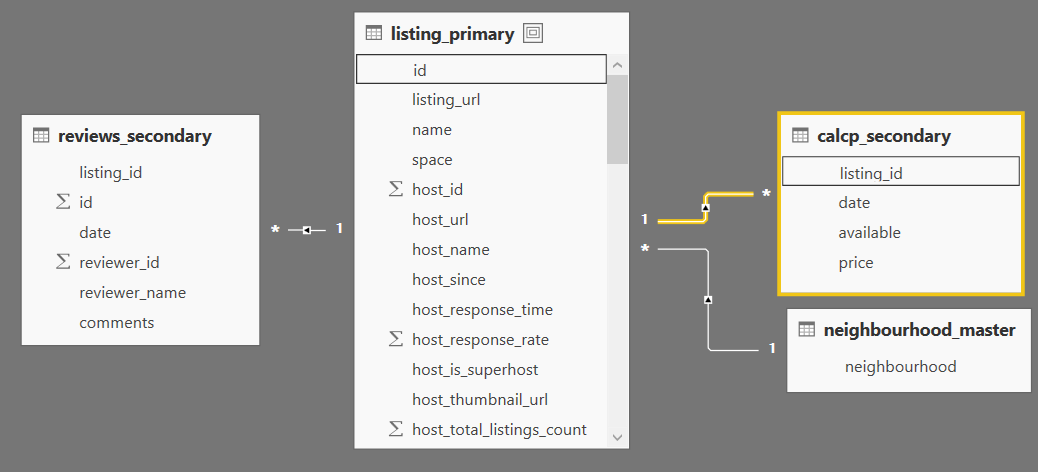

<h3>Exporting Transformed Dataframes</h3>

In [92]:
#os.mkdir('transformed')

In [93]:
listext.to_csv(cwd+r'/transformed/listing.csv')
neighcp.to_csv(cwd+r'/transformed/neighbourhood.csv')
revcp.to_csv(cwd+r'/transformed/reviews.csv')
calcp.to_csv(cwd+r'/transformed/calendar.csv')

In [99]:
%%HTML
<div class='tableauPlaceholder' id='viz1552854625503' style='position: relative'><noscript><a href='#'><img alt=' ' src='https:&#47;&#47;public.tableau.com&#47;static&#47;images&#47;sa&#47;san_diego-accom_list_13319&#47;SanDiegoAccomodationHousing&#47;1_rss.png' style='border: none' /></a></noscript><object class='tableauViz'  style='display:none;'><param name='host_url' value='https%3A%2F%2Fpublic.tableau.com%2F' /> <param name='embed_code_version' value='3' /> <param name='path' value='views&#47;san_diego-accom_list_13319&#47;SanDiegoAccomodationHousing?:embed=y&amp;:display_count=y&amp;publish=yes' /> <param name='toolbar' value='yes' /><param name='static_image' value='https:&#47;&#47;public.tableau.com&#47;static&#47;images&#47;sa&#47;san_diego-accom_list_13319&#47;SanDiegoAccomodationHousing&#47;1.png' /> <param name='animate_transition' value='yes' /><param name='display_static_image' value='yes' /><param name='display_spinner' value='yes' /><param name='display_overlay' value='yes' /><param name='display_count' value='yes' /></object></div>                <script type='text/javascript'>                    var divElement = document.getElementById('viz1552854625503');                    var vizElement = divElement.getElementsByTagName('object')[0];                    vizElement.style.width='1600px';vizElement.style.height='927px';                    var scriptElement = document.createElement('script');                    scriptElement.src = 'https://public.tableau.com/javascripts/api/viz_v1.js';                    vizElement.parentNode.insertBefore(scriptElement, vizElement);                </script>

In [94]:
#clear un-used variables to reduce memory footprint
%who

calcp	 calendar	 city_map	 copy	 cwd	 data	 download_plotlyjs	 go	 i	 
init_notebook_mode	 iplot	 l	 listcp	 listext	 listing	 loc_map	 merged	 neighbourhoods	 
neighcp	 np	 os	 pathlib	 pd	 plot	 re	 revcp	 reviews	 
state_map	 tools	 
